# Aim - To code up a decision tree from scratch to better understand the algorithm

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.datasets import california_housing

In [52]:
class DecisionTree(object):
    """Implementation of a simple decision tree based machine learning algorithm"""
    def __init__(self, training_data: pd.DataFrame):
        self.training_data = training_data
    def show_features(self):
        return self.training_data.columns
    def find_best_split(self, variable_name):
        if self.training_data[variable_name].dtype == 'float64':
            split_values = []
            sum_squared_error = []
            for feature_value in self.training_data[variable_name]:
                split_values.append(feature_value)
                sum_squared_error.append(DecisionTree.make_continuos_variable_split(self.training_data[variable_name], 
                                                                                    feature_value))
            return split_values, sum_squared_error
    @staticmethod
    def make_continuos_variable_split(array: np.array, splitting_value: float):
        left_node = array[array < splitting_value]
        left_node_purity = DecisionTree.sum_squared_error(left_node)
        right_node = array[array > splitting_value]
        right_node_purity = DecisionTree.sum_squared_error(right_node)
        return left_node_purity + right_node_purity
    @staticmethod
    def sum_squared_error(node_data: np.array):
        return sum((node_data - node_data.mean()) ** 2)

In [53]:
data = california_housing.fetch_california_housing()['data']
feature_names = california_housing.fetch_california_housing()['feature_names']
target = california_housing.fetch_california_housing()['target']

df = pd.DataFrame(data, columns=feature_names)
df['target'] = target

In [54]:
model = DecisionTree(df)

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
target        float64
dtype: object

In [56]:
split_values, sum_squared_errors = model.find_best_split('HouseAge')

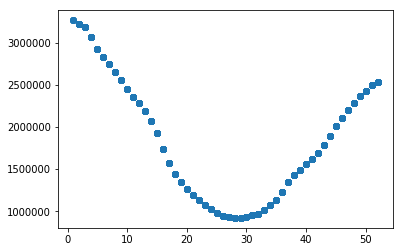

In [59]:
plt.scatter(split_values, sum_squared_errors)